**Алгоритм поиска**

In [11]:
def search_in(array, number):
    return number in array

**Линейный поиск**

In [3]:
def LinearSearch(nums, val):
    for i in range(len(nums)):
        if nums[i] == val:
            return i
    return -1

**Бинарный поиск**

In [2]:
def BinarySearch(nums, val):
    first = 0
    last = len(nums)-1
    index = -1
    while (first <= last) and (index == -1):
        mid = (first+last)//2
        if nums[mid] == val:
            index = mid
        else:
            if val<nums[mid]:
                last = mid -1
            else:
                first = mid +1
    return index

**Jump search**

In [1]:
def JumpSearch(nums, val):
    length = len(nums)
    jump = int(length**0.5)
    left, right = 0, 0
    while left < length and nums[left] <= val:
        right = min(length - 1, left + jump)
        if nums[left] <= val and nums[right] >= val:
            break
        left += jump;
    if left >= length or nums[left] > val:
        return -1
    right = min(length - 1, right)
    i = left
    while i <= right and nums[i] <= val:
        if nums[i] == val:
            return i
        i += 1
    return -1

**Поиск Фибоначчи**

In [5]:
def FibonacciSearch(nums, val):
    fibM_minus_2 = 0
    fibM_minus_1 = 1
    fibM = fibM_minus_1 + fibM_minus_2
    while (fibM < len(nums)):
        fibM_minus_2 = fibM_minus_1
        fibM_minus_1 = fibM
        fibM = fibM_minus_1 + fibM_minus_2
    index = -1;
    while (fibM > 1):
        i = min(index + fibM_minus_2, (len(nums)-1))
        if (nums[i] < val):
            fibM = fibM_minus_1
            fibM_minus_1 = fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
            index = i
        elif (nums[i] > val):
            fibM = fibM_minus_2
            fibM_minus_1 = fibM_minus_1 - fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
        else :
            return i
    if(fibM_minus_1 and index < (len(nums)-1) and nums[index+1] == val):
        return index+1;
    return -1

**Экспоненциальный поиск**

In [6]:
def ExponentialSearch(nums, val):
    if nums[0] == val:
        return 0
    index = 1
    while index < len(nums) and nums[index] <= val:
        prev_index = index
        index = index * 2
    return BinarySearch(nums[:min(index, len(nums))], val)

**Интерполяционный поиск**

In [7]:
def InterpolationSearch(nums, val):
    low = 0
    high = (len(nums) - 1)
    while low <= high and val >= nums[low] and val <= nums[high]:
        index = low + int(((float(high - low) / ( nums[high] - nums[low])) * ( val - nums[low])))
        if nums[index] == val:
            return index
        if nums[index] < val:
            low = index + 1;
        else:
            high = index - 1;
    return -1

**Пузырьковая сортировка**

In [35]:
def bubble_sort(nums):
    # Устанавливаем swapped в True, чтобы цикл запустился хотя бы один раз
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(nums) - 1):
            if nums[i] > nums[i + 1]:
                # Меняем элементы
                nums[i], nums[i + 1] = nums[i + 1], nums[i]
                # Устанавливаем swapped в True для следующей итерации
                swapped = True

**Сортировка выборкой**

In [36]:
def selection_sort(nums):
    # Значение i соответствует кол-ву отсортированных значений
    for i in range(len(nums)):
        # Исходно считаем наименьшим первый элемент
        lowest_value_index = i
        # Этот цикл перебирает несортированные элементы
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j
        # Самый маленький элемент меняем с первым в списке
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]

**Сортировка вставками**

In [37]:
def insertion_sort(nums):
    # Сортировку начинаем со второго элемента, т.к. считается, что первый элемент уже отсортирован
    for i in range(1, len(nums)):
        item_to_insert = nums[i]
        # Сохраняем ссылку на индекс предыдущего элемента
        j = i - 1
        # Элементы отсортированного сегмента перемещаем вперёд, если они больше
        # элемента для вставки
        while j >= 0 and nums[j] > item_to_insert:
            nums[j + 1] = nums[j]
            j -= 1
        # Вставляем элемент
        nums[j + 1] = item_to_insert

**Сортировка слиянием**

In [38]:
def merge(left_list, right_list):
    sorted_list = []
    left_list_index = right_list_index = 0

    # Длина списков часто используется, поэтому создадим переменные для удобства
    left_list_length, right_list_length = len(left_list), len(right_list)

    for _ in range(left_list_length + right_list_length):
        if left_list_index < left_list_length and right_list_index < right_list_length:
            # Сравниваем первые элементы в начале каждого списка
            # Если первый элемент левого подсписка меньше, добавляем его
            # в отсортированный массив
            if left_list[left_list_index] <= right_list[right_list_index]:
                sorted_list.append(left_list[left_list_index])
                left_list_index += 1
            # Если первый элемент правого подсписка меньше, добавляем его
            # в отсортированный массив
            else:
                sorted_list.append(right_list[right_list_index])
                right_list_index += 1

        # Если достигнут конец левого списка, элементы правого списка
        # добавляем в конец результирующего списка
        elif left_list_index == left_list_length:
            sorted_list.append(right_list[right_list_index])
            right_list_index += 1
        # Если достигнут конец правого списка, элементы левого списка
        # добавляем в отсортированный массив
        elif right_list_index == right_list_length:
            sorted_list.append(left_list[left_list_index])
            left_list_index += 1

    return sorted_list

def merge_sort(nums):
    # Возвращаем список, если он состоит из одного элемента
    if len(nums) <= 1:
        return nums

    # Для того чтобы найти середину списка, используем деление без остатка
    # Индексы должны быть integer
    mid = len(nums) // 2

    # Сортируем и объединяем подсписки
    left_list = merge_sort(nums[:mid])
    right_list = merge_sort(nums[mid:])

    # Объединяем отсортированные списки в результирующий
    return merge(left_list, right_list)

**Быстрая сортировка**

In [60]:
def partition(nums, low, high):
    pivot = nums[(low + high) // 2]
    i = low - 1
    j = high + 1
    while True:
        i += 1
        while nums[i] < pivot:
            i += 1

        j -= 1
        while nums[j] > pivot:
            j -= 1

        if i >= j:
            return j

        nums[i], nums[j] = nums[j], nums[i]

def quick_sort(nums, low, high):
    def _quick_sort(items, low, high):
        if low < high:
            split_index = partition(items, low, high)
            _quick_sort(items, low, split_index)
            _quick_sort(items, split_index + 1, high)

    _quick_sort(nums, low, high)

**Задание 1**

In [24]:
from random import randint
array1 = [randint(1, 1000) for _ in range(100)]
number1 = array1[5]

In [25]:
time1_search_in = %timeit -o search_in(array1, number1)
time1_LinearSearch = %timeit -o LinearSearch(array1, number1)
time1_BinarySearch = %timeit -o BinarySearch(array1, number1)
time1_JumpSearch = %timeit -o JumpSearch(array1, number1)
time1_FibonacciSearch = %timeit -o FibonacciSearch(array1, number1)
time1_ExponentialSearch = %timeit -o ExponentialSearch(array1, number1)
time1_InterpolationSearch = %timeit -o InterpolationSearch(array1, number1)

203 ns ± 5.91 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
658 ns ± 7.91 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.99 µs ± 439 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
4.61 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.87 µs ± 225 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.38 µs ± 31.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
502 ns ± 114 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


**Задача 2**

In [20]:
from random import randint
array2 = [randint(1, 1000) for _ in range(100)]
number2 = array2[95]

In [26]:
time2_search_in = %timeit -o search_in(array2, number2)
time2_LinearSearch = %timeit -o LinearSearch(array2, number2)
time2_BinarySearch = %timeit -o BinarySearch(array2, number2)
time2_JumpSearch = %timeit -o JumpSearch(array2, number2)
time2_FibonacciSearch = %timeit -o FibonacciSearch(array2, number2)
time2_ExponentialSearch = %timeit -o ExponentialSearch(array2, number2)
time2_InterpolationSearch = %timeit -o InterpolationSearch(array2, number2)

1.28 µs ± 331 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
6.31 µs ± 251 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.03 µs ± 438 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
504 ns ± 11.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
4.66 µs ± 57.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.07 µs ± 72.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
456 ns ± 89.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


**Задача 3**

**Вывод:**

Алгоритмы первой задачи выполняются быстрее второй.

In [27]:
time1 = [time1_search_in.best, time1_LinearSearch.best, time1_BinarySearch.best, time1_JumpSearch.best, time1_FibonacciSearch.best, time1_ExponentialSearch.best, time1_InterpolationSearch.best]
time2 = [time2_search_in.best, time2_LinearSearch.best, time2_BinarySearch.best, time2_JumpSearch.best, time2_FibonacciSearch.best, time2_ExponentialSearch.best, time2_InterpolationSearch.best]

In [29]:
import matplotlib.pyplot as plt

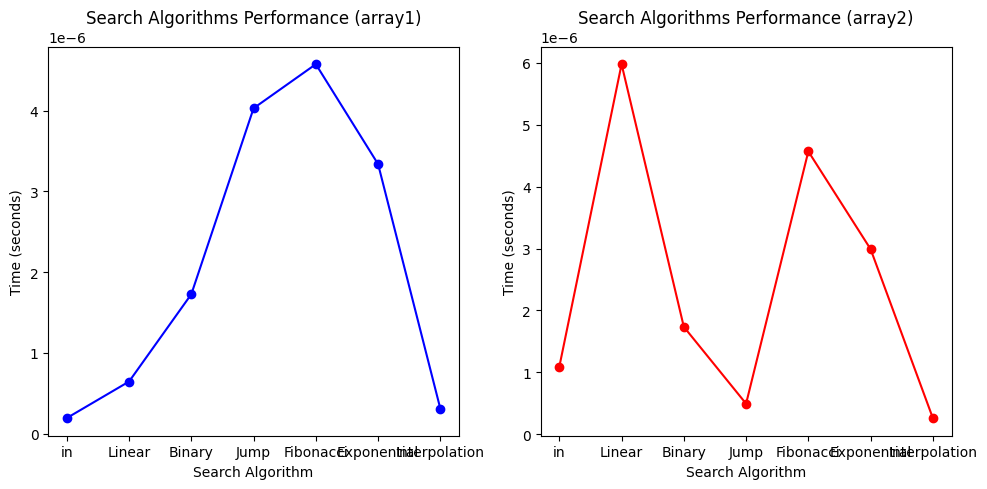

In [87]:
search_algorithms = ["in", "Linear", "Binary", "Jump", "Fibonacci", "Exponential", "Interpolation"]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(search_algorithms, time1, marker='o', color='b')
plt.title('Search Algorithms Performance (array1)')
plt.xlabel('Search Algorithm')
plt.ylabel('Time (seconds)')

plt.subplot(1, 2, 2)
plt.plot(search_algorithms, time2, marker='o', color='r')
plt.title('Search Algorithms Performance (array2)')
plt.xlabel('Search Algorithm')
plt.ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

**Задача 4**

In [56]:
array4 = list(range(1, 101))
print(array4)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [57]:
import timeit

In [74]:
time4_bubble_sort = %timeit -o bubble_sort(array4)
time4_selection_sort = %timeit -o selection_sort(array4)
time4_insertion_sort = %timeit -o insertion_sort(array4)
time4_merge = timeit.timeit(lambda: merge_sort(array4), number=10)
time4_quick_sort = %timeit -o quick_sort(array4, 0, len(array4)-1)

25.7 µs ± 7.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
605 µs ± 160 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
20.1 µs ± 3.38 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
125 µs ± 30 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Задача 5**

In [62]:
array5 = list(range(100, 0, -1))
print(array5)

[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [80]:
time5_bubble_sort = %timeit -o bubble_sort(array5)
time5_selection_sort = %timeit -o selection_sort(array5)
time5_insertion_sort = %timeit -o insertion_sort(array5)
time5_merge = timeit.timeit(lambda: merge_sort(array5), number=10)
time5_quick_sort = %timeit -o quick_sort(array5, 0, len(array5)-1)

22.5 µs ± 8.53 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
504 µs ± 134 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
20.1 µs ± 4.4 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
125 µs ± 31.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Задача 6**

In [83]:
time4 = [
    time4_bubble_sort.average,
    time4_selection_sort.average,
    time4_insertion_sort.average,
    time4_merge,
    time4_quick_sort.average
]
time5 = [
    time5_bubble_sort.average,
    time5_selection_sort.average,
    time5_insertion_sort.average,
    time5_merge,
    time5_quick_sort.average
]

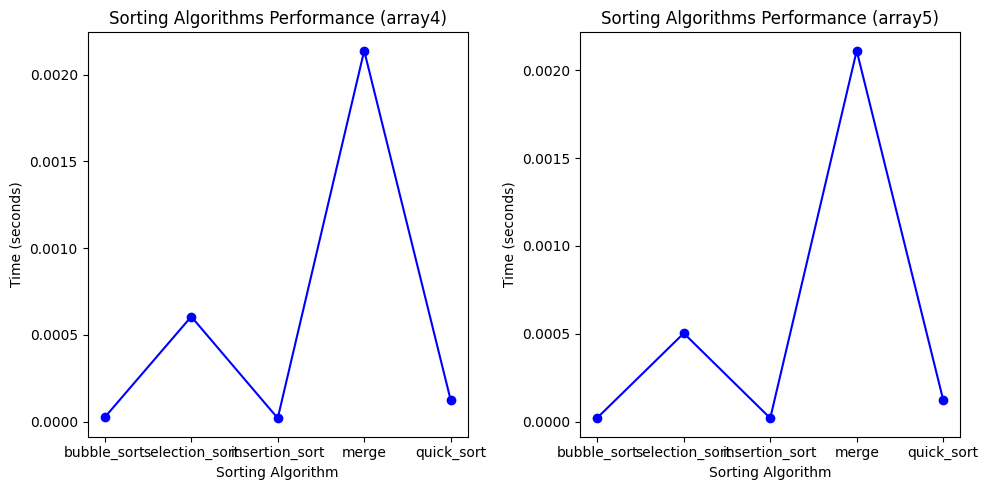

In [86]:
sort_algorithms = ["bubble_sort", "selection_sort", "insertion_sort", "merge", "quick_sort"]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(sort_algorithms, time4, marker='o', color='b')
plt.title('Sorting Algorithms Performance (array4)')
plt.xlabel('Sorting Algorithm')
plt.ylabel('Time (seconds)')

plt.subplot(1, 2, 2)
plt.plot(sort_algorithms, time5, marker='o', color='b')
plt.title('Sorting Algorithms Performance (array5)')
plt.xlabel('Sorting Algorithm')
plt.ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

**Вывод:**

Порядок данных (одинаковых массивов) никак не влияет на скорость работы алгоритмов.